In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from thinkbayes2 import Cdf as CDF

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X, y = datasets.make_classification(n_samples=10000)

logistic_regression


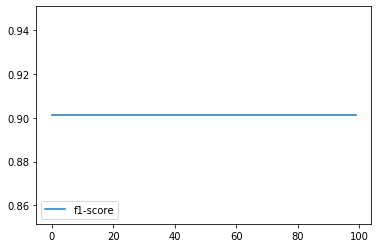

decision tree


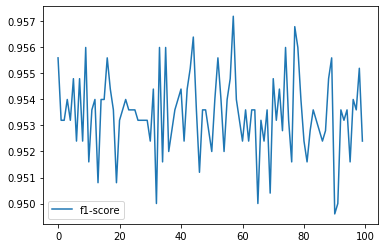

gradient boosted tree


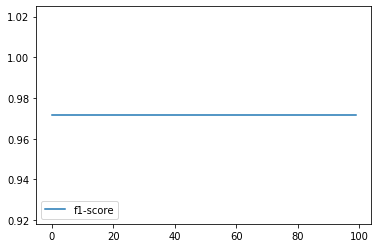

random forest


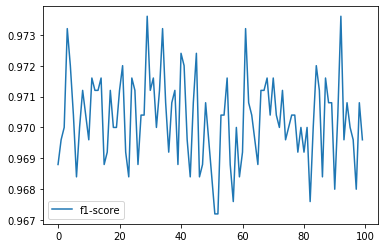

In [5]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(X, y, i):
    return train_test_split(
        X, y, random_state=0
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(X, y, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        X_train, X_test, y_train, y_test = get_data(X, y, i)
        if seed_varies:
            np.random.seed(i)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
variable_accuracy = get_accuracy(X, y, max_seed, seed_varies)
plot_accuracy(variable_accuracy)

In [6]:
from sklearn.metrics import classification_report
f1_scores = [elem["f1_score"] for elem in variable_accuracy if elem["clf"] == "decision tree"]
print("Optimal Sample Analysis")
print(max(f1_scores))
random_seed = f1_scores.index(max(f1_scores))
print(random_seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.20)
X_test_one, X_test_two, y_test_one, y_test_two = train_test_split(
    X_test, y_test, random_state=0, train_size=0.50
)
np.random.seed(random_seed)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_one = clf.predict(X_test_one)
y_pred_two = clf.predict(X_test_two)
print(classification_report(y_test_one, y_pred_one))
print(classification_report(y_test_two, y_pred_two))

Optimal Sample Analysis
0.9572
57
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1999
           1       0.94      0.94      0.94      2001

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1985
           1       0.93      0.95      0.94      2015

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [8]:
from sklearn.metrics import classification_report
f1_scores = [elem["f1_score"] for elem in variable_accuracy if elem["clf"] == "decision tree"]
print("Most Suboptimal Sample Analysis")
print(min(f1_scores))
random_seed = f1_scores.index(min(f1_scores))
print(random_seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.20)
X_test_one, X_test_two, y_test_one, y_test_two = train_test_split(
    X_test, y_test, random_state=0, train_size=0.50
)
np.random.seed(random_seed)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_one = clf.predict(X_test_one)
y_pred_two = clf.predict(X_test_two)
print(classification_report(y_test_one, y_pred_one))
print(classification_report(y_test_two, y_pred_two))

Most Suboptimal Sample Analysis
0.9496
90
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1999
           1       0.93      0.94      0.94      2001

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1985
           1       0.93      0.95      0.94      2015

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



logistic_regression


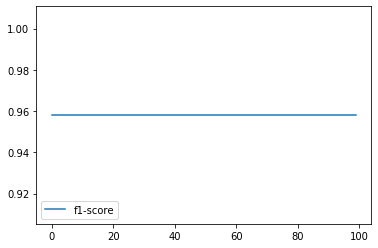

decision tree


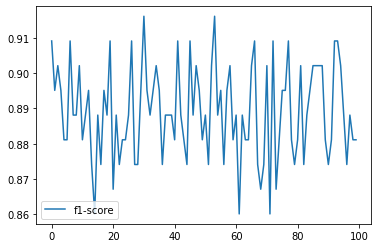

gradient boosted tree


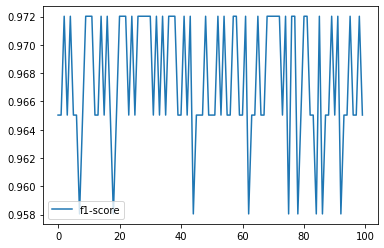

random forest


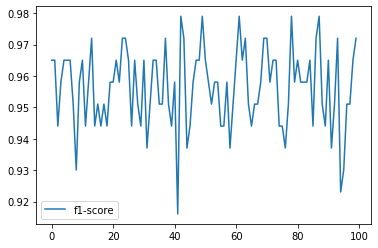

In [20]:
def get_data(i):
    X, y = datasets.load_breast_cancer(return_X_y=True)
    return train_test_split(
        X, y, random_state=0
    )

def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(X, y, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        if seed_varies:
            np.random.seed(i)
        X_train, X_test, y_train, y_test = get_data(i)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
variable_accuracy = get_accuracy(X, y, max_seed, seed_varies)
plot_accuracy(variable_accuracy)

In [21]:
X, y = datasets.load_breast_cancer(return_X_y=True)
from sklearn.metrics import classification_report
f1_scores = [elem["f1_score"] for elem in variable_accuracy if elem["clf"] == "decision tree"]
print("Optimal Sample Analysis")
print(max(f1_scores))
random_seed = f1_scores.index(max(f1_scores))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.20)
X_test_one, X_test_two, y_test_one, y_test_two = train_test_split(
    X_test, y_test, random_state=0, train_size=0.50
)
np.random.seed(random_seed)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_one = clf.predict(X_test_one)
y_pred_two = clf.predict(X_test_two)
print(classification_report(y_test_one, y_pred_one))
print(classification_report(y_test_two, y_pred_two))

Optimal Sample Analysis
0.916083916083916
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        82
           1       0.90      0.97      0.93       146

    accuracy                           0.91       228
   macro avg       0.92      0.89      0.90       228
weighted avg       0.91      0.91      0.91       228

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        87
           1       0.94      0.99      0.96       141

    accuracy                           0.95       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228



In [22]:
from sklearn.metrics import classification_report
f1_scores = [elem["f1_score"] for elem in variable_accuracy if elem["clf"] == "decision tree"]
print("Most Suboptimal Sample Analysis")
print(min(f1_scores))
random_seed = f1_scores.index(max(f1_scores))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.20)
X_test_one, X_test_two, y_test_one, y_test_two = train_test_split(
    X_test, y_test, random_state=0, train_size=0.50
)
np.random.seed(random_seed)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_one = clf.predict(X_test_one)
y_pred_two = clf.predict(X_test_two)
print(classification_report(y_test_one, y_pred_one))
print(classification_report(y_test_two, y_pred_two))

Most Suboptimal Sample Analysis
0.8601398601398601
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        82
           1       0.90      0.97      0.93       146

    accuracy                           0.91       228
   macro avg       0.92      0.89      0.90       228
weighted avg       0.91      0.91      0.91       228

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        87
           1       0.94      0.99      0.96       141

    accuracy                           0.95       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228



logistic_regression


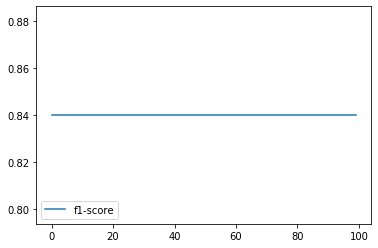

decision tree


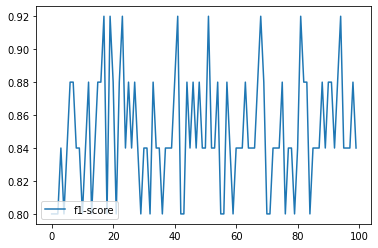

gradient boosted tree


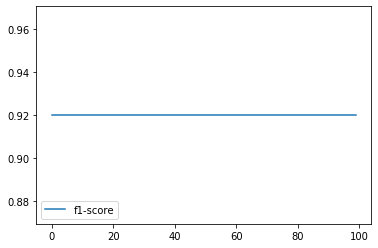

random forest


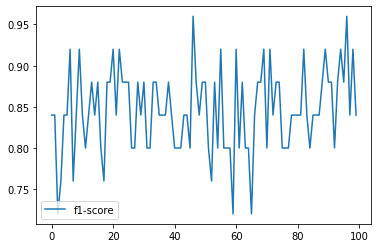

In [7]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(X, y, i):
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(X, y, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        if seed_varies:
            np.random.seed(i)
        X_train, X_test, y_train, y_test = get_data(X, y, max_seed)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
variable_accuracy = get_accuracy(X, y, max_seed, seed_varies)
plot_accuracy(variable_accuracy)

logistic_regression


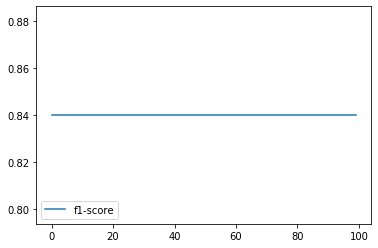

decision tree


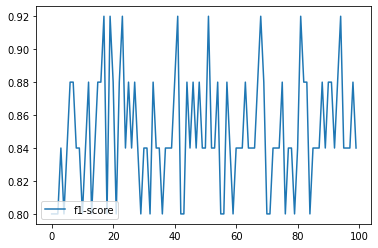

gradient boosted tree


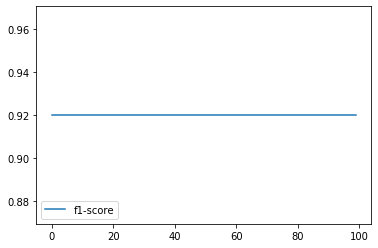

random forest


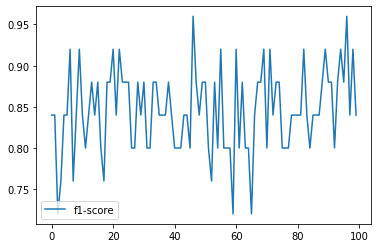

In [8]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(X, y, i):
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(
    X_train, X_test, y_train, 
    y_test, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        if seed_varies:
            np.random.seed(i)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
X_train, X_test, y_train, y_test = get_data(X, y, max_seed)
variable_accuracy = get_accuracy(
    X_train, X_test, y_train, 
    y_test, max_seed, seed_varies
)
plot_accuracy(variable_accuracy)

global i 99
local i 0
local i 1
local i 2
local i 3
local i 4
local i 5
local i 6
local i 7
local i 8
local i 9
local i 10
local i 11
local i 12
local i 13
local i 14
local i 15
local i 16
local i 17
local i 18
local i 19
local i 20
local i 21
local i 22
local i 23
local i 24
local i 25
local i 26
local i 27
local i 28
local i 29
local i 30
local i 31
local i 32
local i 33
local i 34
local i 35
local i 36
local i 37
local i 38
local i 39
local i 40
local i 41
local i 42
local i 43
local i 44
local i 45
local i 46
local i 47
local i 48
local i 49
local i 50
local i 51
local i 52
local i 53
local i 54
local i 55
local i 56
local i 57
local i 58
local i 59
local i 60
local i 61
local i 62
local i 63
local i 64
local i 65
local i 66
local i 67
local i 68
local i 69
local i 70
local i 71
local i 72
local i 73
local i 74
local i 75
local i 76
local i 77
local i 78
local i 79
local i 80
local i 81
local i 82
local i 83
local i 84
local i 85
local i 86
local i 87
local i 88
local i 89
local i 

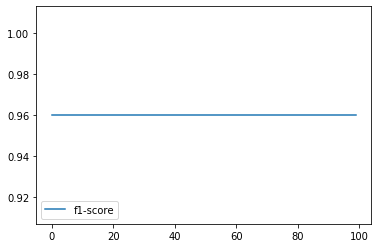

decision tree


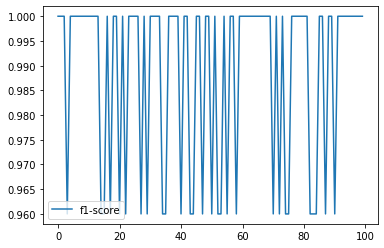

gradient boosted tree


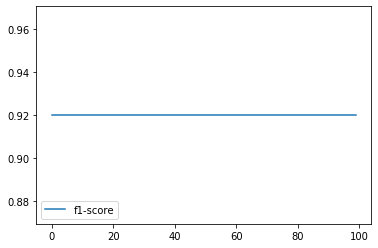

random forest


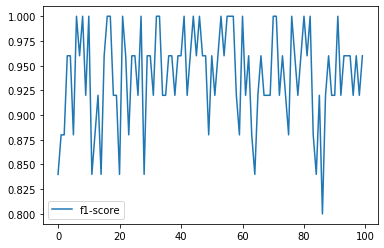

In [20]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(X, y):
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(X, y, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        print("local i", i)
        if seed_varies:
            np.random.seed(i)
        X_train, X_test, y_train, y_test = get_data(X, y)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
i = 99
max_seed = 100
seed_varies = True
print("global i", i)
variable_accuracy = get_accuracy(X, y, max_seed, seed_varies)
print("global i", i)
plot_accuracy(variable_accuracy)

global i 99
local i 0
local i 1
local i 2
local i 3
local i 4
local i 5
local i 6
local i 7
local i 8
local i 9
local i 10
local i 11
local i 12
local i 13
local i 14
local i 15
local i 16
local i 17
local i 18
local i 19
local i 20
local i 21
local i 22
local i 23
local i 24
local i 25
local i 26
local i 27
local i 28
local i 29
local i 30
local i 31
local i 32
local i 33
local i 34
local i 35
local i 36
local i 37
local i 38
local i 39
local i 40
local i 41
local i 42
local i 43
local i 44
local i 45
local i 46
local i 47
local i 48
local i 49
local i 50
local i 51
local i 52
local i 53
local i 54
local i 55
local i 56
local i 57
local i 58
local i 59
local i 60
local i 61
local i 62
local i 63
local i 64
local i 65
local i 66
local i 67
local i 68
local i 69
local i 70
local i 71
local i 72
local i 73
local i 74
local i 75
local i 76
local i 77
local i 78
local i 79
local i 80
local i 81
local i 82
local i 83
local i 84
local i 85
local i 86
local i 87
local i 88
local i 89
local i 

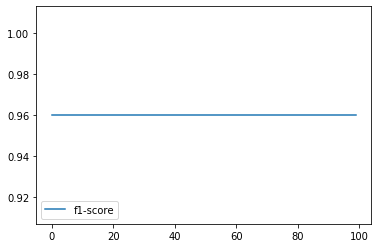

decision tree


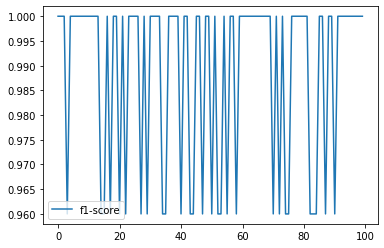

gradient boosted tree


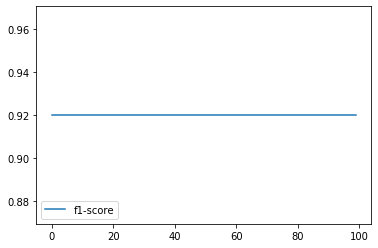

random forest


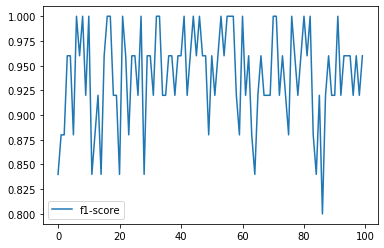

In [11]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(X, y):
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(X_train, X_test, y_train, y_test, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        print("local i", i)
        if seed_varies:
            np.random.seed(i)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()

i = 99
max_seed = 100
seed_varies = True
print("global i", i)
X_train, X_test, y_train, y_test = get_data(X, y)
variable_accuracy = get_accuracy(X_train, X_test, y_train, y_test, max_seed, seed_varies)
print("global i", i)
plot_accuracy(variable_accuracy)

logistic_regression


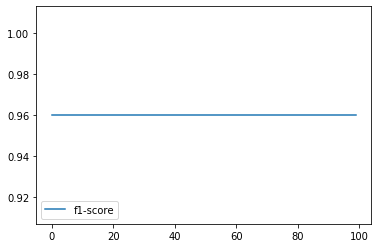

decision tree


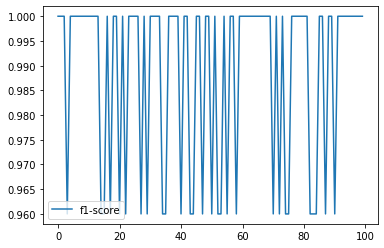

gradient boosted tree


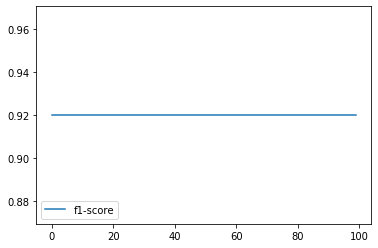

random forest


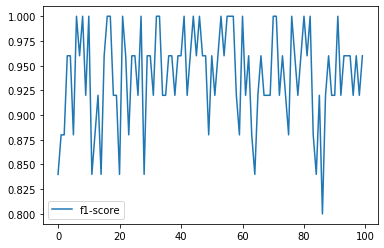

In [19]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
for i in range(100):
    np.random.seed(i)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=99
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(f1)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

logistic_regression


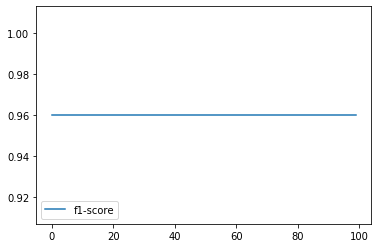

decision tree


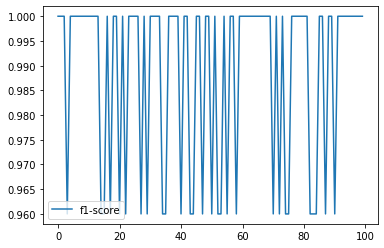

gradient boosted tree


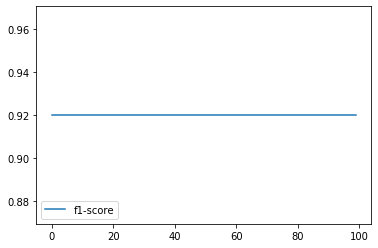

random forest


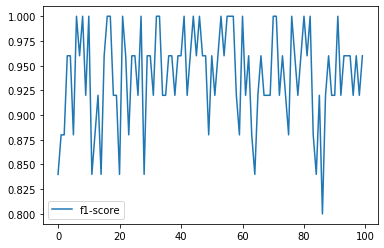

In [18]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def train_test_splitter(X, y, state):
    return train_test_split(
        X, y, random_state=state
    )
constant_accuracy = []
for i in range(100):
    np.random.seed(i)
    X_train, X_test, y_train, y_test = train_test_splitter(X, y, 99) 
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(f1)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

logistic_regression


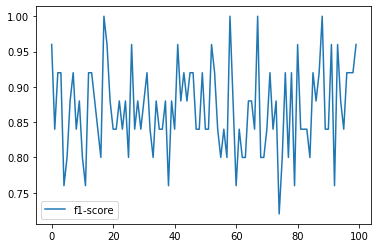

decision tree


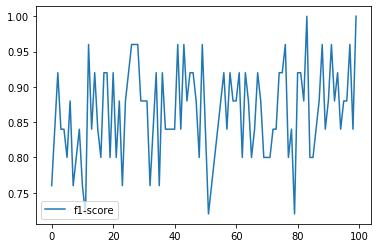

gradient boosted tree


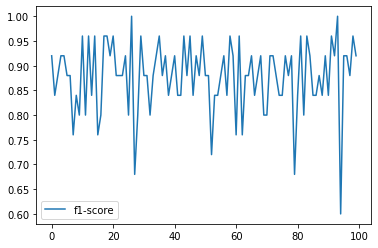

random forest


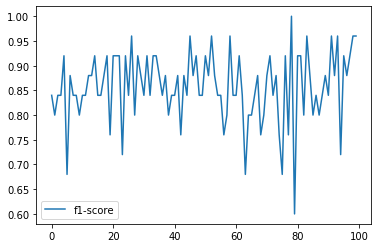

In [15]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
for i in range(100):
    np.random.seed(i)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=i
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(f1)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

Here the random seed changes from 0 - 99.

logistic_regression


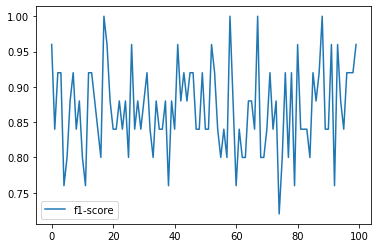

decision tree


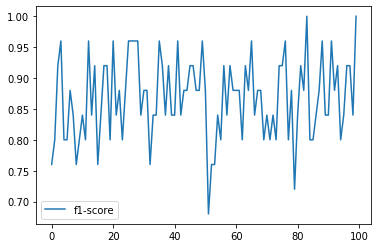

gradient boosted tree


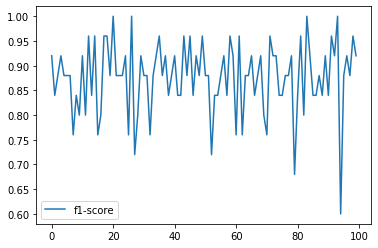

random forest


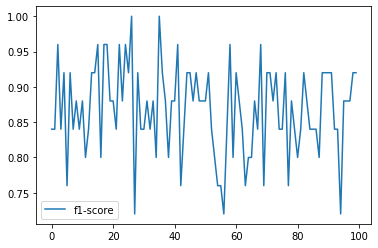

In [16]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
np.random.seed(10)
for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=i
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(f1)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

Here the random seed is fixed at 10 (arbitrarily)

Now let's compare the CDFs in the constant case, version the variable case.

logistic_regression


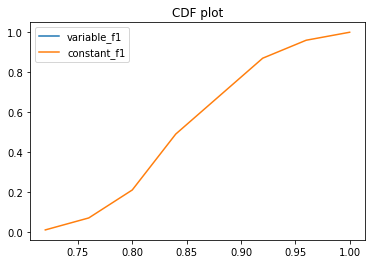

decision tree


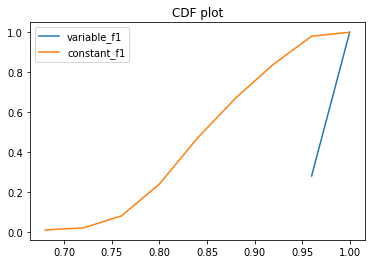

gradient boosted tree


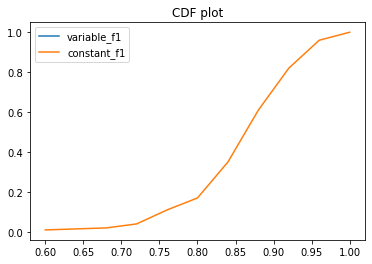

random forest


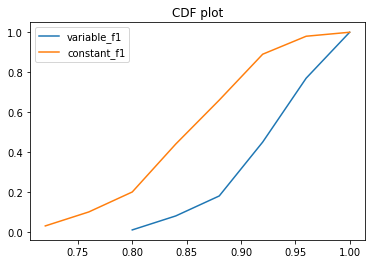

In [17]:
def plot_cdfs(dist_one, dist_name_one, dist_two, dist_name_two):
    cdf_one = CDF(dist_one)
    cdf_two = CDF(dist_two)
    plt.plot(cdf_one.xs, cdf_one.ps, label=dist_name_one)
    plt.plot(cdf_two.xs, cdf_two.ps, label=dist_name_two)
    plt.title("CDF plot")
    plt.legend(loc='upper left')
    plt.show()
    
for clf in clf_names:
    print(clf)
    variable_f1 = [elem["f1_score"] 
          for elem in variable_accuracy 
          if elem["clf"] == clf]

    constant_f1 = [elem["f1_score"] 
          for elem in constant_accuracy 
          if elem["clf"] == clf]

    plot_cdfs(variable_f1, "variable_f1", constant_f1, "constant_f1")